In [1]:
import pandas as pd
import numpy as np

In [ ]:
names = ['Dew Point (°C)', 'Dew Max Point (°C)', 'Hour Max Wind Speed', 'Wind (km/h)', 'Wind Burst (km/h)', 'Avg Temp (°C)',
        'Avg Humidity (%)', 'ETO (mm)', 'Acc Joules', 'Cold Hours', 'Rain (mm)', 'Light Hours']
url = 'plague/tomatoes-plagues.csv'
df = pd.read_csv(url, low_memory=False)

In [ ]:
size = 12

cols = [col for col in list(df.columns) if 'Unnamed' not in col]
length = len(cols)
print(cols)
df2 = df.iloc[:,length - size:length]
df2.head()

In [ ]:
common = ['Fecha','Severidad del Problema', 'Problema', 'Empresa', 'RANCHO']
print(df.columns)
df_common = df[common]
df_common.head()

In [ ]:
df3 = pd.concat([df_common, df2], axis=1)
df3.head()

In [ ]:
df3.to_csv('plague/temp.csv', index=False, encoding='latin1')

In [2]:
common_names = ['Date', 'Severity', 'Problem', 'Company', 'Ranch']
names = ['Dew Point (°C)', 'Dew Max Point (°C)', 'Hour Max Wind Speed', 'Wind (km/h)', 'Wind Burst (km/h)', 'Avg Temp (°C)',
        'Avg Humidity (%)', 'ETO (mm)', 'Acc Joules', 'Cold Hours', 'Rain (mm)', 'Light Hours']
col_names = common_names + names
f = pd.read_csv('plague/temp.csv', low_memory=False, names=col_names, encoding='latin1', header=1)
f.head()

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
0,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/14/2020,Equilibrio,Barrenador del tallo,Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/14/2020,Equilibrio,Crysopas (Crysoperlaspp.),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/14/2020,Equilibrio,Spodoptera exigua (Gusano del soldado),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/14/2020,Equilibrio,Heliothis virescens (Gusano del Fruto),Sino A,PALMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
f.isnull().sum(axis=1)

0        12
1        12
2        12
3        12
4        12
         ..
33550    12
33551    12
33552    12
33553    12
33554    12
Length: 33555, dtype: int64

In [4]:
# series where > 1 is applied to each element
f.isnull().sum(axis=1) < 1

0        False
1        False
2        False
3        False
4        False
         ...  
33550    False
33551    False
33552    False
33553    False
33554    False
Length: 33555, dtype: bool

In [5]:
# drop whenever in a row there is more than one nan
f = f[f.isnull().sum(axis=1) < 1]
f

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
8150,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8151,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8152,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8153,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,NARANJOS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8154,11/30/2020,Equilibrio,Pulgón (Aphididae),Sino A,NARANJOS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33484,4/3/2021,Daño,Poda,Jalim B,EL SALVADOR 2,6.0,11.0,0.736111,19.3,29.0,20.0,54.1,5.33,2299.1,0.0,0.0,10.3
33485,4/3/2021,Daño,Poda,Jalim B,EL SALVADOR 2,6.0,11.0,0.736111,19.3,29.0,20.0,54.1,5.33,2299.1,0.0,0.0,10.3
33486,4/3/2021,Daño,Poda,Jalim B,EL SALVADOR 2,6.0,11.0,0.736111,19.3,29.0,20.0,54.1,5.33,2299.1,0.0,0.0,10.3
33487,4/3/2021,Daño,Poda,Jalim B,EL SALVADOR 2,6.0,11.0,0.736111,19.3,29.0,20.0,54.1,5.33,2299.1,0.0,0.0,10.3


In [ ]:
f.to_csv('plague/test.csv', index=False, encoding='latin1')

In [6]:
# all nan to zeros
f[names] = f[names].add(0, fill_value=0)
f.head()

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
8150,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8151,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8152,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,PALMAS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8153,11/30/2020,Equilibrio,Thrips (Scirtothrips spp.),Sino A,NARANJOS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7
8154,11/30/2020,Equilibrio,Pulgón (Aphididae),Sino A,NARANJOS,8.0,16.0,0.409722,12.9,17.7,18.1,72.9,3.44,1587.8,0.0,0.0,8.7


In [7]:
f.groupby('Cold Hours').size()

Cold Hours
0.0     14030
0.1       174
0.2       126
0.3        11
0.4       292
        ...  
11.2       72
11.4       18
11.5       47
12.5       45
13.0      116
Length: 88, dtype: int64

In [8]:
f.groupby('Date').size()

Date
1/10/2021    124
1/11/2021    186
1/12/2021    214
1/13/2021    285
1/14/2021    216
            ... 
3/7/2021      97
3/8/2021      69
3/9/2021     311
4/1/2021     114
4/3/2021      85
Length: 115, dtype: int64

In [9]:
f.groupby('Problem').size() # returns a series

Problem
Abejas                                           8
Agallas de la corona                             4
Alternaria spp.                               2230
Babosas                                          1
Barrenador del tallo                             1
Bemisia spp. (Mosca blanca )                    68
Botritys (Botrytis cinerea)                   1329
Brevipalpus spp. (Ácaro rojo)                 4731
Caracoles                                        2
Catarina (Coccinellidea)                         4
Chinche asesina (Reduviidae)                     2
Chinche pirata (Orius spp.)                      3
Crysopas (Crysoperlaspp.)                        1
Escamas                                          1
Gallina Ciega                                    1
Gusano Enrollador                               52
Gusano Enrollador (Platynota stultana)           4
Heliothis virescens (Gusano del Fruto)          76
Marcos con abejas                                9
Mosca psyrphidea (Psyrp

In [10]:
prob = f.groupby('Problem').size()
prob['Abejas']

8

In [11]:
sev = list(f.groupby('Severity').size().index)
sev

['Controle', 'Daño', 'Equilibrio']

In [12]:
prob_dicts = {}
sep = '-'
for p in list(prob.index):
    for s in sev:
        d = {n: [] for n in names}
        prob_dicts[p + sep + s] = d
        
prob_dicts

{'Abejas-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Daño': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Equilibrio': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Agallas de la corona-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],


In [13]:
f['Severity'].str.contains('Equilibrio')

8150      True
8151      True
8152      True
8153      True
8154      True
         ...  
33484    False
33485    False
33486    False
33487    False
33488    False
Name: Severity, Length: 22646, dtype: bool

In [14]:
eq = f[f['Severity'].str.contains('Equilibrio')]
eq_bees = eq[eq['Problem'].str.contains('Abejas')]
eq_bees

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours


In [15]:
# take out all the different values of °C when equilibrium
eq.groupby(names[0]).size()

Dew Point (°C)
-22.0       3
-19.0       5
-13.0       5
-11.0      55
-10.0       6
-7.0        2
-6.0       20
-5.0       54
-4.0       25
-3.0       76
-2.0       58
-1.0      162
 0.0      922
 1.0      375
 2.0      365
 3.0      682
 4.0     1272
 5.0     1498
 6.0     2212
 7.0     2068
 8.0     2835
 9.0     1891
 10.0    1687
 11.0     269
 12.0      64
 13.0     125
 14.0      38
 15.0      48
 16.0      14
dtype: int64

In [16]:
eq.groupby(names[0]).size()[-22]

3

In [17]:
eq_prob1 = eq[eq['Problem'].str.contains('Agallas de la corona')]
eq_prob1

,Date,Severity,Problem,Company,Ranch,Dew Point (°C),Dew Max Point (°C),Hour Max Wind Speed,Wind (km/h),Wind Burst (km/h),Avg Temp (°C),Avg Humidity (%),ETO (mm),Acc Joules,Cold Hours,Rain (mm),Light Hours
27009,3/18/2021,Equilibrio,Agallas de la corona,Sino A,NARANJOS,7.0,14.0,0.565972,20.9,29.0,17.6,68.6,5.33,2357.3,0.0,0.0,10.1
33042,3/6/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-1.0,8.0,0.644444,17.7,32.2,18.7,43.0,5.08,2184.7,0.0,0.0,9.8
33051,3/5/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-4.0,4.0,0.604861,17.7,25.7,20.5,29.2,6.10,2332.1,0.0,0.0,9.7
33066,3/5/2021,Equilibrio,Agallas de la corona,Jalim B,EL SALVADOR 1,-4.0,4.0,0.604861,17.7,25.7,20.5,29.2,6.10,2332.1,0.0,0.0,9.7


In [18]:
# equilibrium of agallas problem: all the dew point temperatures found
eq_prob1.groupby(names[0]).size()

Dew Point (°C)
-4.0    2
-1.0    1
 7.0    1
dtype: int64

In [19]:
eq_prob1[names[0]].values

array([ 7., -1., -4., -4.])

In [20]:
eq_prob1.groupby(names[0]).size().values

array([2, 1, 1], dtype=int64)

In [21]:
#eq = f[f['Severity'].str.contains('Equilibrio')]
#eq_prob1 = eq[eq['Problem'].str.contains('Agallas de la corona')]
#eq_prob1.groupby(names[0]).size()
# by problem-severity, store all the found values and freq by each col
problems = list(prob.index)
for s in sev:
    f_sev = f[f['Severity'].str.contains(s)]
    if len(list(f_sev.values)) == 0:
        continue
    for p in problems:
        f_sev_prob = f_sev[f_sev['Problem'].str.contains(p)]
        if len(list(f_sev_prob.values)) == 0:
            continue
        for col in names:
            #val = list(f_sev_prob.groupby(col).size().index)
            #freq = list(f_sev_prob.groupby(col).size().values)
            #prob_dicts[p+sep+s][col] = [val, freq]
            val = list(f_sev_prob[col].values)
            if len(val) == 0:
                continue
            prob_dicts[p+sep+s][col] = val
prob_dicts

C:\Users\mariana\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


{'Abejas-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Daño': {'Dew Point (°C)': [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 0.0, 0.0],
  'Dew Max Point (°C)': [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 15.0, 15.0],
  'Hour Max Wind Speed': [0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.572916667,
   0.572916667],
  'Wind (km/h)': [19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 32.2, 32.2],
  'Wind Burst (km/h)': [20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 35.4, 35.4],
  'Avg Temp (°C)': [15.3, 15.3, 15.3, 15.3, 15.3, 15.3, 17.9, 17.9],
  'Avg Humidity (%)': [84.1, 84.1, 84.1, 84.1, 84.1, 84.1, 71.0, 71.0],
  'ETO (mm)': [0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 14.22, 14.22],
  'Acc Joules': [1650.6,
   1650.6,
   1650.6,
   1650

In [22]:
to_delete = []
for ps, v1 in list(prob_dicts.items()):
    for col, v2 in list(prob_dicts[ps].items()):
        if prob_dicts[ps][col] == 0:
            del prob_dicts[ps][col]
prob_dicts = {k: v for k,v in list(prob_dicts.items()) if len(list(prob_dicts[k].keys())) > 0}
prob_dicts

{'Abejas-Controle': {'Dew Point (°C)': [],
  'Dew Max Point (°C)': [],
  'Hour Max Wind Speed': [],
  'Wind (km/h)': [],
  'Wind Burst (km/h)': [],
  'Avg Temp (°C)': [],
  'Avg Humidity (%)': [],
  'ETO (mm)': [],
  'Acc Joules': [],
  'Cold Hours': [],
  'Rain (mm)': [],
  'Light Hours': []},
 'Abejas-Daño': {'Dew Point (°C)': [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 0.0, 0.0],
  'Dew Max Point (°C)': [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 15.0, 15.0],
  'Hour Max Wind Speed': [0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.597222222,
   0.572916667,
   0.572916667],
  'Wind (km/h)': [19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 32.2, 32.2],
  'Wind Burst (km/h)': [20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 35.4, 35.4],
  'Avg Temp (°C)': [15.3, 15.3, 15.3, 15.3, 15.3, 15.3, 17.9, 17.9],
  'Avg Humidity (%)': [84.1, 84.1, 84.1, 84.1, 84.1, 84.1, 71.0, 71.0],
  'ETO (mm)': [0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 14.22, 14.22],
  'Acc Joules': [1650.6,
   1650.6,
   1650.6,
   1650

In [23]:
prob_dicts['Babosas-Equilibrio']

{'Dew Point (°C)': [6.0],
 'Dew Max Point (°C)': [16.0],
 'Hour Max Wind Speed': [0.450694444],
 'Wind (km/h)': [14.5],
 'Wind Burst (km/h)': [19.3],
 'Avg Temp (°C)': [15.0],
 'Avg Humidity (%)': [78.7],
 'ETO (mm)': [2.95],
 'Acc Joules': [1469.3],
 'Cold Hours': [3.8],
 'Rain (mm)': [0.0],
 'Light Hours': [8.2]}

In [24]:
names

['Dew Point (°C)',
 'Dew Max Point (°C)',
 'Hour Max Wind Speed',
 'Wind (km/h)',
 'Wind Burst (km/h)',
 'Avg Temp (°C)',
 'Avg Humidity (%)',
 'ETO (mm)',
 'Acc Joules',
 'Cold Hours',
 'Rain (mm)',
 'Light Hours']

In [31]:
sev

['Controle', 'Daño', 'Equilibrio']

<ipython-input-30-89cb91945e90>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig1.add_subplot(len(problems), 3, counter)


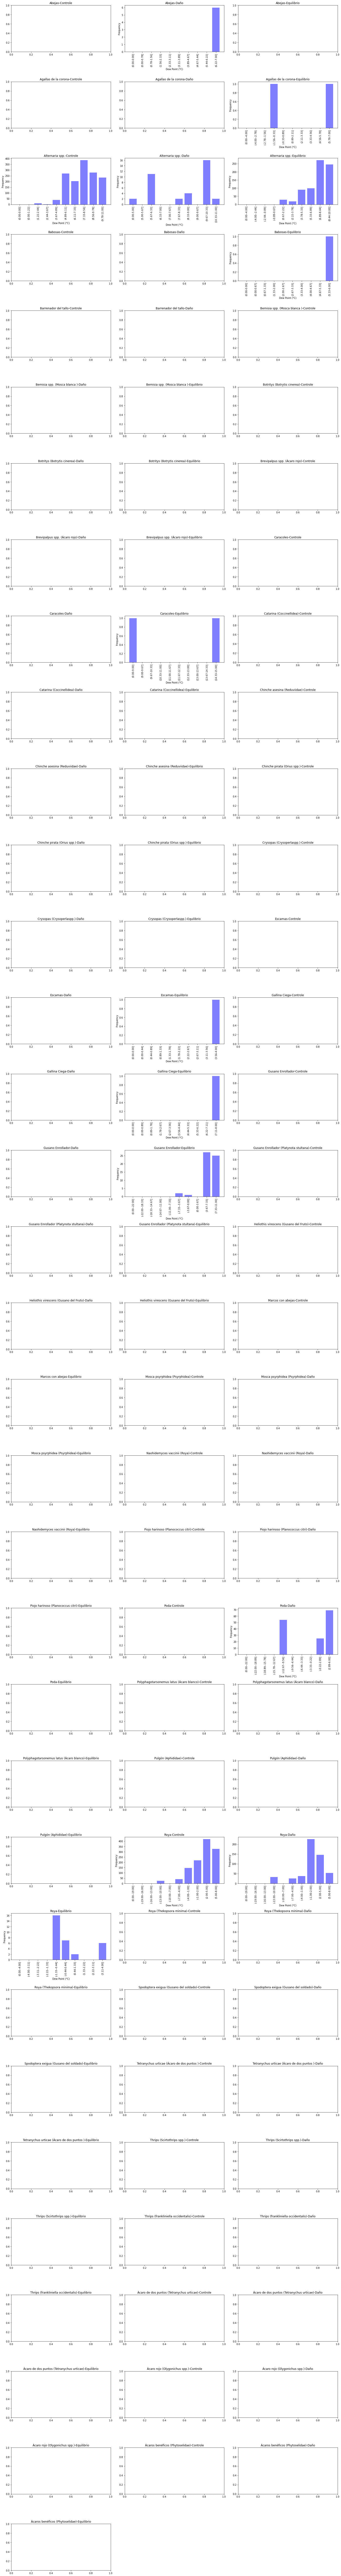

In [30]:
import matplotlib.pyplot as plt

bars = 10
problems = list(prob.index)
#problems = ['Alternaria spp.']
#fig1 = plt.figure(figsize=(14, 5))
colors = [(0,0,1,0.5), (1,0,0,0.5), (0,1,0,0.5)]

fig1 = plt.figure(figsize=(20, 150))
counter = 1
for i in range(len(problems)):
    for j in range(len(sev)):
        p = problems[i]
        col = 'Dew Point (°C)'
        s = sev[j]
        #ax1 = fig1.add_subplot(len(problems), 3,(i*3) + (j+1))
        ax1 = fig1.add_subplot(len(problems), 3, counter)
        key = p+sep+s
        if (key not in prob_dicts.keys()):
            ax1.set_title(p + sep + s)
            counter += 1
            continue
        if (col not in prob_dicts[key].keys()):
            continue
        if len(prob_dicts[p+sep+s][col]) == 0:
            ax1.set_title(p + sep + s)
            counter += 1
            continue
        curr = prob_dicts[p+sep+s][col]
        intervals = []
        if min(curr) == max(curr):
            intervals = np.linspace(min(curr)-max(curr), max(curr), bars)
        else:
            intervals = np.linspace(min(curr), max(curr), bars)

        intervals = list(intervals)
        intervals = [0.0] + intervals
        if max(intervals) == 0.0:
            continue

        heights = [0 for i in intervals[1:]]
        xs = list(range(len(heights)))
        xlabels = ["({:.2f}-{:.2f}]".format(intervals[h-1], intervals[h]) for h in range(1, len(intervals))]

        for interval in range(len(intervals) - 1):
            minVal = intervals[interval]
            maxVal = intervals[interval + 1]
            for c in curr:
                if c > minVal and c <= maxVal:
                    heights[interval] += 1
        ax1.set_xticks(xs)
        ax1.set_xticklabels(xlabels, rotation=90)
        ax1.bar(xs, heights, color=colors[0])

        ax1.set_title(p + sep + s)
        plt.ylabel('Frequency')
        plt.xlabel(col)
        fig1.tight_layout()
        #fig1.savefig('images/' + col + '.png', dpi=300)
        counter += 1
#fig1.suptitle(f"Attribute: ({col})\n", fontsize="x-large")
#fig1.subplots_adjust(top=0.01)
plt.show()

#plt.show()

In [ ]:
fig1 = plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(3):
        ax1 = fig1.add_subplot(4, 3, (i*3) + (j + 1))
plt.show()